# Проект №10 - Линейная алгебра

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## 1. Загрузка данных

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,3
import random as r
import scipy as sp
from numpy.random import RandomState
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('/datasets/insurance.csv')
print(df.shape)
df.head()

(5000, 5)


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


##### Проверим на дубли

In [22]:
df.duplicated().sum()

153

In [23]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
Пол                  4847 non-null int64
Возраст              4847 non-null float64
Зарплата             4847 non-null float64
Члены семьи          4847 non-null int64
Страховые выплаты    4847 non-null int64
dtypes: float64(2), int64(3)
memory usage: 189.5 KB


In [24]:
df['Возраст'] = df['Возраст'].astype('int64')
df['Зарплата'] = df['Зарплата'].astype('int64')

In [25]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


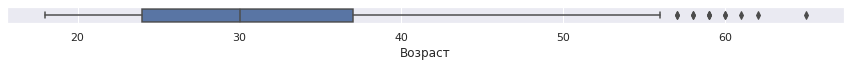

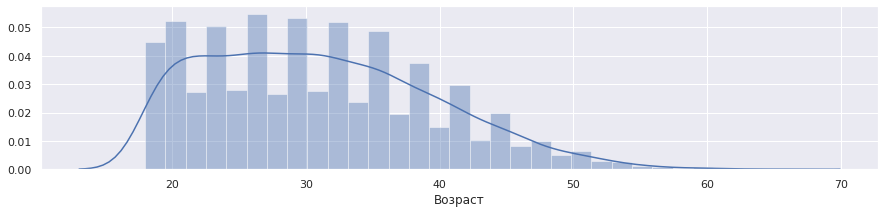

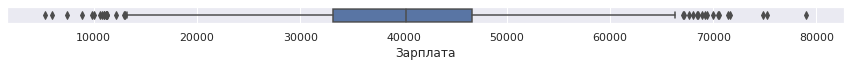

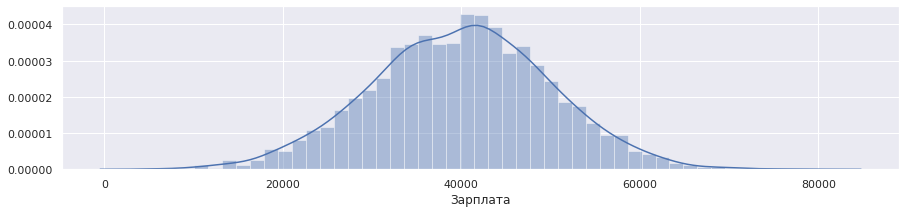

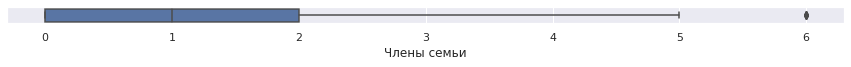

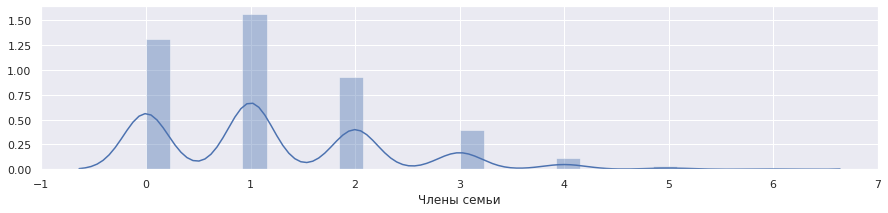

In [26]:
for i in df.iloc[:,[1,2,3]].columns:
    plt.figure(figsize=(15,.3))
    sns.boxplot(df[i])
    plt.show()
    plt.figure(figsize=(15,3))
    sns.distplot(df[i])
    plt.show()

Зарплата и возраст - нормальное распредлеление, количество членов семьи напоминет распределение Пуассона 

In [27]:
df['Страховые выплаты'].value_counts()/df['Страховые выплаты'].shape[0]

0    0.883846
1    0.087270
2    0.023520
3    0.003714
4    0.001444
5    0.000206
Name: Страховые выплаты, dtype: float64

График в данном случае, будет малоинформативен, поэтому лучше рассмотреть доли. Из чего следует, что выплаты 88.7% не были осуществленны по тем или иным причинам, а пять старховых выплат - это скорее исключение из правил.

In [28]:
df.columns = ['male', 'age', 'salary', 'family_members', 'insurance_payment']
df.head()

,male,age,salary,family_members,insurance_payment
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [29]:
df.male.value_counts()

0    2431
1    2416
Name: male, dtype: int64

##### Проверим на нулевые значения (__Nan, None__)

In [30]:
df.isna().sum()

male                 0
age                  0
salary               0
family_members       0
insurance_payment    0
dtype: int64

##### Вывод:
Данные чистые. Дубликаты записей были удалены, следует проверить изнчальный источник информации. Пропусков не обнаружено.
Выбросов не обнаружено.

## 2. Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Для решения этого задания достаточно знать, что:


1. $AB \neq BA$
2. $ (AB)^{-1} = B^{-1}A^{-1} $
3. $ (AB)^{T} = B^{T}A^{T} $
4. $ AA^{-1} = E $
5. $ АЕ = ЕА = А $

В формулу вектора весов линейной регрессии w подставляем произведение XP вместо X. Получится выражение для w’ (вектор весов после преобразования). P – обратимая квадратная матрица (матрица преобразования).
Используем вышеприведенные формулы, преобразуем получившееся выражение и получаем зависимость между параметром w’ (вектор весов
после преобразования) и w (вектор весов до преобразования).
Затем в формулу предсказания (а = Xw) подставляем XP вместо Х, и w’ вместо w.

**Обоснование**

Запишем исходное уравнение весов:
$$
w = (X^{T}X)^{-1}X^{T}y
$$
---
Докажем, что при умножении на матрицу имеющую обратную ничего не изменится. Запишем вместо Х произведение Х\*Р, тогда:  
$ w'=((XP)^{T}(XP))^{-1}(XP)^{T}y = (P^{T}X^{T}XP)^{-1}P^{T}X^{T}y = P^{-1}(X^{T}X)^{-1}P^{T^{-1}}P^{T}X^{T}y$, где $P^{T^{-1}}P^{T} = E$, тогда $w'=P^{-1}*[(X^{T}X)^{-1}X^{T}y]=P^{-1}w$  - связь между $w$ и $w'$ мы нашли, теперь подставим в 
$$
a = Xw
$$ 
---
Получаем: $a'= XP*w' = XPP^{-1}w = XEw = Xw = a$

Таким образом мы доказали, что преобразование подобного типа не повлияет на предсказание.

##### Проверим гипотезу о том, что умножив марицу признаков на другую, у которой существект обратная и умножив на обратную получим исходную матрицу признаков

In [31]:
np.random.seed(12345)
check = []
for i in range(1000):
    P = np.random.normal(5, 100, size=(4,4)).astype('int64')
    A = np.random.normal(50, 700, size=(4,4)).astype('int64')
    check.append(np.linalg.det(np.rint(A @ P @ np.linalg.inv(P)).astype('int64') == A))
print(P)
print()
print(A)
np.prod(np.array(check))

[[ -62   62  -31 -159]
 [   4  -20  -88  -92]
 [ -18   63 -112 -156]
 [  10   64  -67  -18]]

[[ -75  365 -368   -1]
 [-282  -87   27 -146]
 [ 220  215 1008 -162]
 [-624  681  804  814]]


0.0

#### Вывод: гипотеза подтвердилась

## 3. Алгоритм преобразования

**Алгоритм**

Для шифрования воспользуемся квадратной обратимой матрицей - $P$, где $XP=X_{cripto}$ - процесс шифрования, а $X_{cripto}P^{-1}=X$. Ранее обосновал возможность использования матрицы $P$ для шифрования исходной матрицы признаков. 

## 4. Проверка алгоритма

In [32]:
X = df.drop('insurance_payment', axis = 1)
Y = df['insurance_payment']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)
print(y_train.shape[0] == x_train.shape[0])

True


In [33]:
class LinearRegression:
    def fit(self, x_traine, y_traine):
        x_traine_matrix = np.concatenate((np.ones((x_traine.shape[0], 1)), x_traine), axis=1)
        #x_train_matrix =X.values
        y_traine_vector = np.array(y_traine)       
        w = np.linalg.inv(x_traine_matrix.T @ x_traine_matrix) @ x_traine_matrix.T @ y_traine_vector
        self.w = w[1:]
        self.w0 = w[0]
        print(self.w)
        print()
        return self.w, self.w0  
 
    def predict(self, x_teste):
        x_teste_matrix = x_teste.values
        #y_test_vector = np.array(y_test)
        a = x_teste_matrix @ self.w + self.w0 
        return a    

In [34]:
model = LinearRegression()
model.fit(x_train, y_train)
predicted = pd.Series(model.predict(x_test))
r2 = r2_score(y_test, predicted)
print(r2)

[ 1.45766006e-02  3.64782925e-02  1.79476487e-07 -1.23345017e-02]

0.423077276158367


In [35]:
model = LinearRegression()
model.fit(X, Y)
predicted = pd.Series(model.predict(X))
r2_without_cripto = r2_score(Y, predicted)

#Модель для шифрования
model_cripto = LinearRegression()
#Шифруем
loc = np.random.randint(2,100)
std = np.random.randint(2,100)
P = np.random.normal(loc, std, size=(4,4)).astype('int64')
X_cripto = pd.DataFrame(data = X.values@P, columns = X.columns)
#Проверка на шифрованных данных
model_cripto.fit(X_cripto, Y)
predicted = pd.Series(model_cripto.predict(X_cripto))
r2_with_cripto = r2_score(Y, predicted)

print(r2_without_cripto)
print(r2_with_cripto)

[ 9.46018167e-03  3.61640080e-02 -1.38992804e-07 -1.42517375e-02]

[-0.00056294  0.00059113 -0.00027172  0.00017734]

0.4302010046633359
0.43020100450809506


# Вывод
Шифрование удалось, как понимаю, при шифровании главное требуется, чтобы матрица шифровщик, в нашем случае P, была квадратной и имела обрабную, должна соответствовать количеству столбцов в исходной матрице.

In [36]:
X_cripto

,male,age,salary,family_members
0,11565010,11713329,6990214,8385844
1,8863084,8976450,5354031,6425888
2,4898684,4961278,2958361,3551320
3,9720352,9845178,5878223,7049396
4,6086894,6164885,3677680,4413096
...,...,...,...,...
4842,8323724,8430452,5031586,6035956
4843,12215932,12372666,7385523,8858528
4844,7902756,8004196,4778514,5731116
4845,7623722,7721627,4609477,5528640
